<a href="https://colab.research.google.com/github/alex-smith-uwec/CS-420/blob/main/genetic/Genetic_Terrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
def f1(x,y):
  return np.sin(x)+np.cos(y)



In [46]:
def f2(x,y):
  return 3*(1-x)**2*np.exp(-x**2 - (y+1)**2) - 10*(x/5 - x**3 - y**5)*np.exp(-x**2 - y**2) - 1/3*np.exp(-(x+1)**2 - y**2)

Benchmark [Rastrigin Function](https://en.wikipedia.org/wiki/Rastrigin_function)

In [37]:
def rast(x,y):
  return (x**2 - 10 * np.cos(2 * np.pi * x)) + (y**2 - 10 * np.cos(2 * np.pi * y)) + 20

In [47]:
def fitness(x, y):
    return f2(x,y)

In [48]:
def blend_crossover(parent1, parent2, alpha):
    child = [0, 0]
    for i in range(2):
        lower = min(parent1[i], parent2[i]) - alpha * abs(parent1[i] - parent2[i])
        upper = max(parent1[i], parent2[i]) + alpha * abs(parent1[i] - parent2[i])
        child[i] = random.uniform(lower, upper)
    return child

def mutate(individual, mutation_rate, mutation_range):
    mutated_individual = individual.copy()
    for i in range(len(mutated_individual)):
        if random.random() < mutation_rate:
            mutated_individual[i]+= random.uniform(-mutation_range, mutation_range)
    return mutated_individual

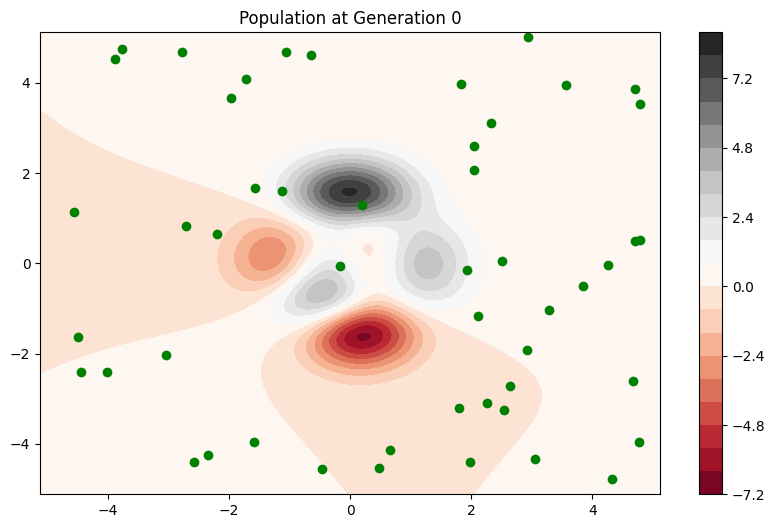

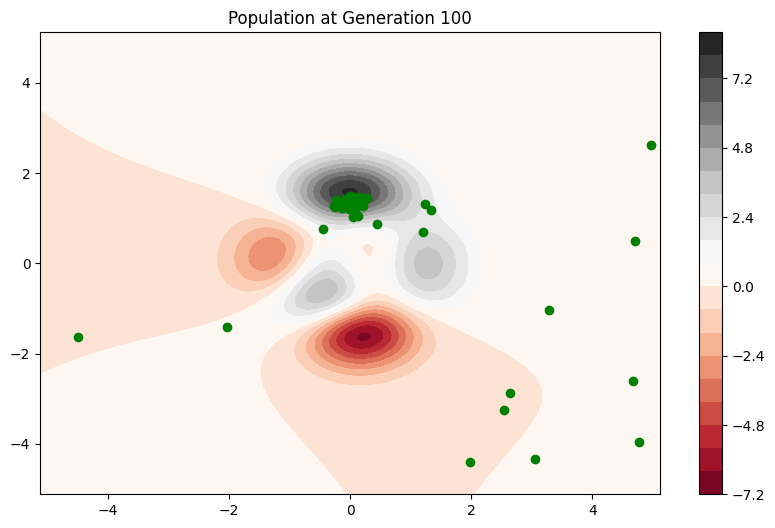

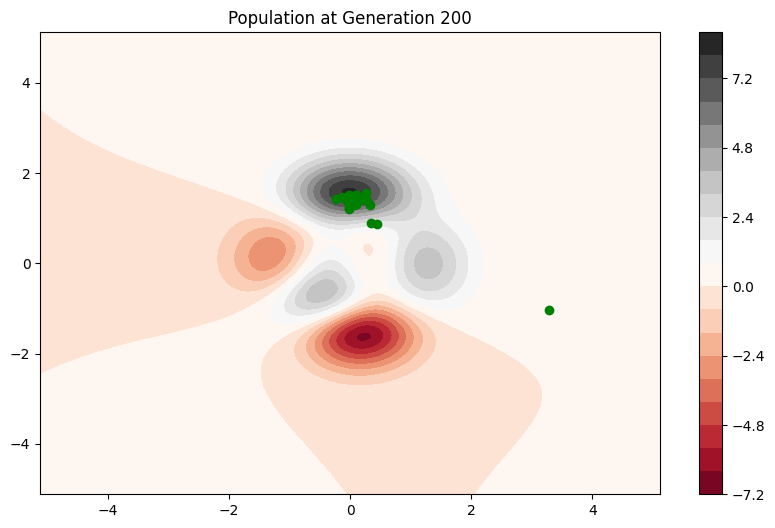

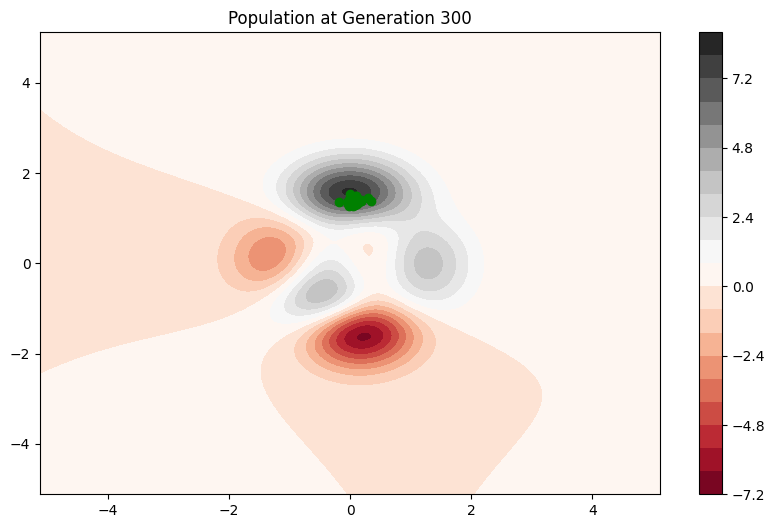

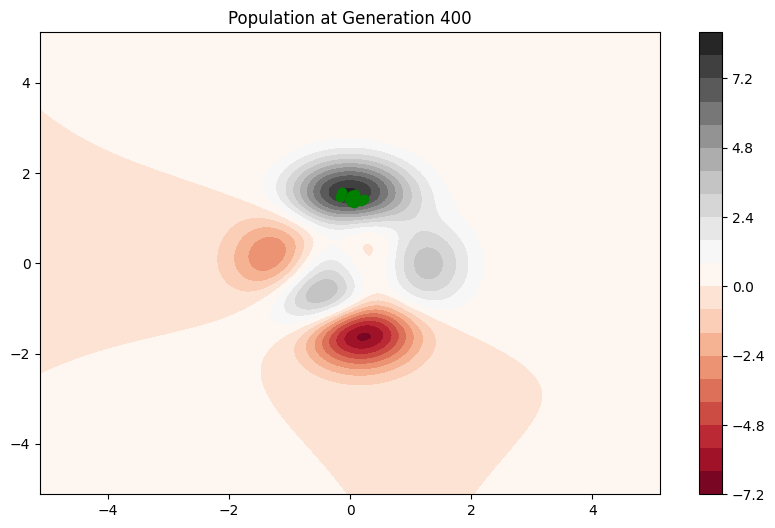

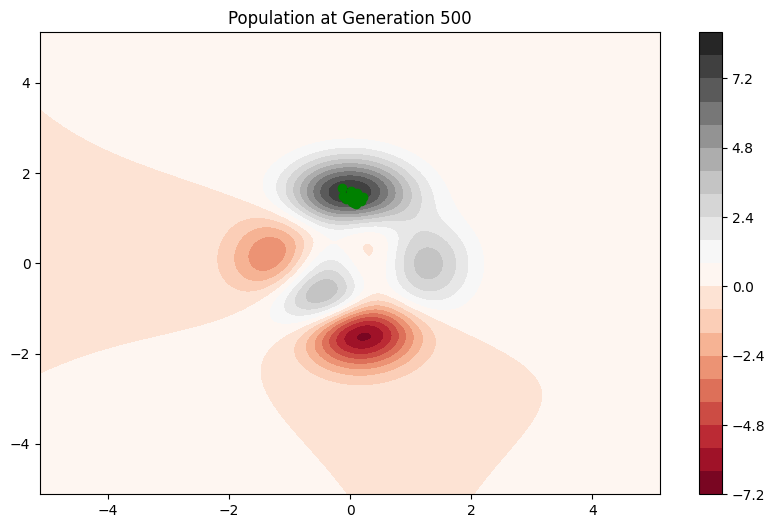

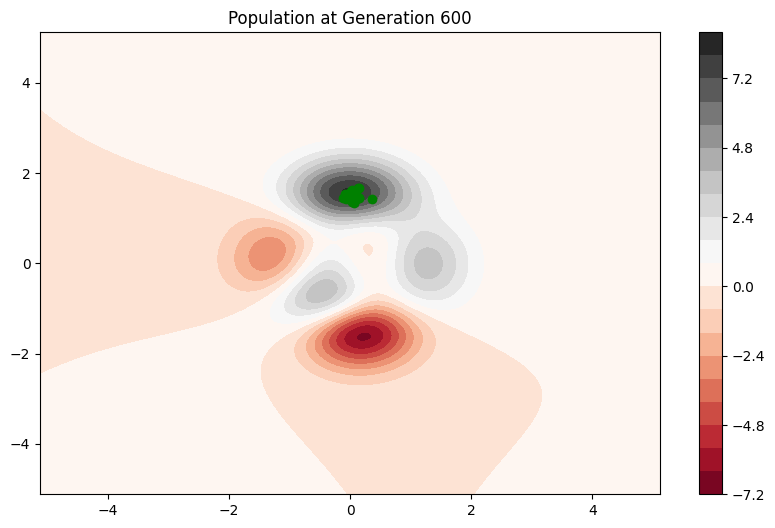

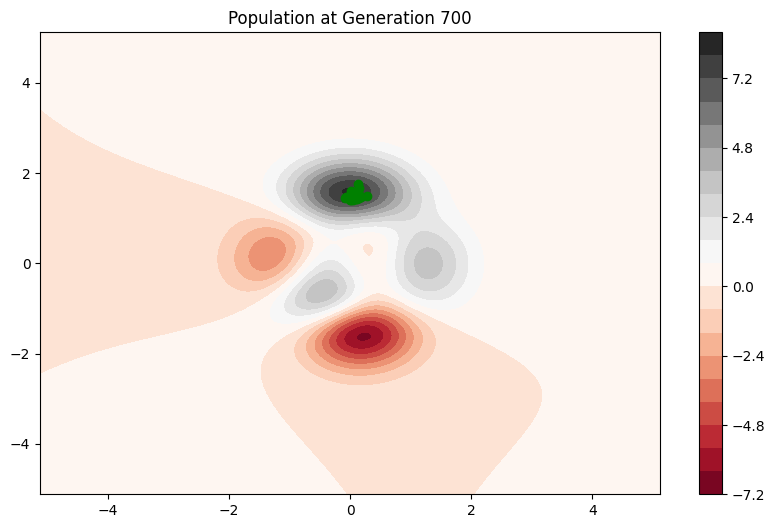

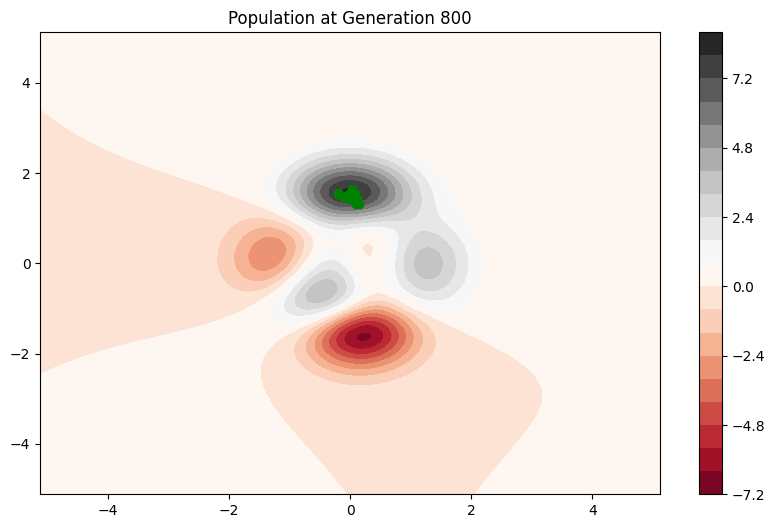

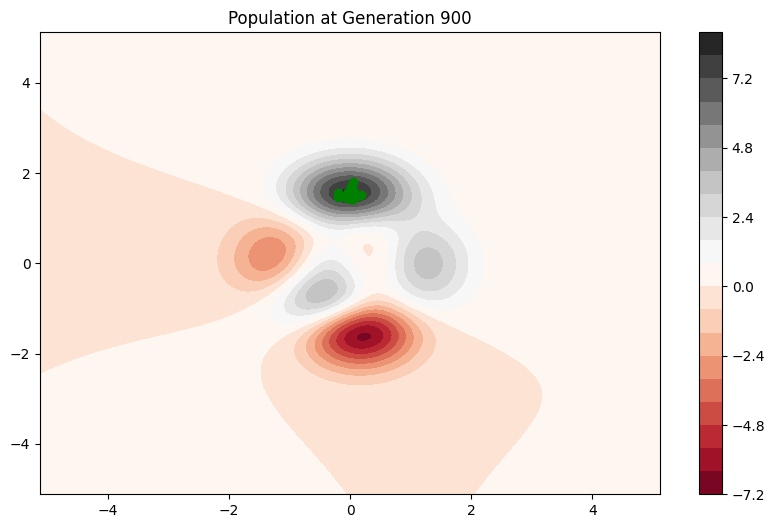

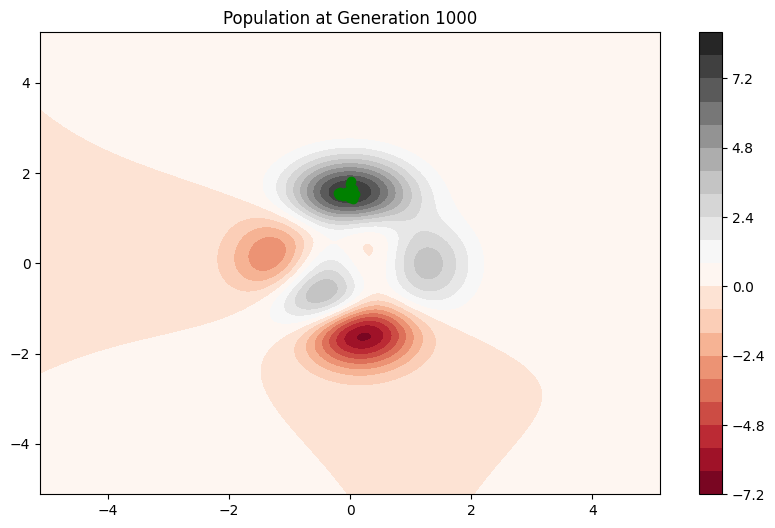

Best solution: [-0.0061475344043606245, 1.5660550693114688]
Best fitness: 8.102295582659725


In [49]:
def genetic_algorithm(population_size, generations, alpha, mutation_rate, mutation_range):
    # Generate initial population
    population = [[random.uniform(-5.12, 5.12), random.uniform(-5.12, 5.12)] for _ in range(population_size)]
    generation_populations = {0: population.copy()}

    for g in range(generations):
        # Evaluate fitness for each individual
        fitness_values = [fitness(individual[0], individual[1]) for individual in population]

        min_fitness = min(fitness_values)
        shifted_fitness_values = [fitness_value - min_fitness for fitness_value in fitness_values]
        total_shifted_fitness = sum(shifted_fitness_values)
        probabilities = [shifted_fitness_value / total_shifted_fitness for shifted_fitness_value in shifted_fitness_values]

        parents = random.choices(population, probabilities, k=2)

        # Apply blend crossover to generate offspring
        offspring = blend_crossover(parents[0], parents[1], alpha)

        # Mutate the offspring
        offspring = mutate(offspring, mutation_rate, mutation_range)

        # Replace a random individual in the population with the offspring
        population[random.randint(0, population_size - 1)] = offspring

        # Store population every 100 generations
        if (g+1) % 100 == 0:
            generation_populations[g+1] = population.copy()

    best_individual = max(population, key=lambda individual: fitness(individual[0], individual[1]))
    best_fitness = fitness(best_individual[0], best_individual[1])

    return generation_populations, best_individual, best_fitness

# Example usage
population_size = 50
generations = 1000
alpha = 0.1
mutation_rate = 0.1
mutation_range = 0.25

generation_populations, best_solution, best_fitness = genetic_algorithm(population_size, generations, alpha, mutation_rate, mutation_range)

# Function to generate contour plot
def plot_population(population, title):
    x = np.linspace(-5.12, 5.12, 400)
    y = np.linspace(-5.12, 5.12, 400)
    X, Y = np.meshgrid(x, y)
    Z = fitness(X, Y)
    plt.figure(figsize=(10, 6))
    plt.contourf(X, Y, Z, 20, cmap='RdGy')
    plt.colorbar()
    plt.scatter(*zip(*population), color='green')
    plt.title(title)
    plt.show()

for generation, population in generation_populations.items():
    plot_population(population, f'Population at Generation {generation}')

print("Best solution:", best_solution)
print("Best fitness:", best_fitness)
